In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [13]:
#Lab 9 Advection Diffusion
#Explore the movement of salt in a shallow estuarine channel
#1 April 2011  MH

fr = 1;
# Define the Parameters (be sure to convert lengths to cm)  UNITS!!!
# Note *a and 8b include running the model again to see how results change
L=2e6;       #length of estuary (20 km)
h=1.5e3;     #depth of estuary (15 m)
dx=5e4;      #horizontal grid spacing (0.5 km)
dz=1e2;      #vertical grid spacing (1 m)
Kh=1e6;      #horizontal diffusivity (10^6 cm^2/s)
Kv=0.110;    #vertical diffusivity (two values 0.1 and 10 cm^2/s)
B0=3e-5;     #applied pressure gradient (three values 7e-5, 0, -7e-5 cm^2/s)
Mu=1;        #dynamic viscosity (g/(cm*s))
Uo=8;        #applied surface velocity (cm/s)
Vm=0.000125; #growth rate in inverse seconds
Cmax=5.0;
tideamp=10.0;

Ks=1.0;   #half saturation coefficient
dt=200;   #Set up time and nodes

X=list()  #create X=0:dx:L
I = 0
while I <= L:
    X.append(I)
    I = I + dx

Z=list()  #create a list of depth locations (Z=0:dz:h)
I = 0
while I <= h:
    Z.append(I)
    I = I + dz

Ntimes=2500 # total number of timesteps
nz = math.floor(h/dz+1) # number of z (depth) elements

print(nz)

16


In [3]:
#set up plot parameter for velocity field
xV = np.linspace(0.0, L, num=11)
zV = np.linspace(0.0, h, num=11)
XV,ZV = np.meshgrid(xV,zV)
Uv=np.zeros(len(XV));

utS=np.zeros(Ntimes);
utB=np.zeros(Ntimes);
utt=np.zeros(Ntimes);

#Set up salinity matrix
s = (math.floor(h/dz+1),math.floor(L/dx+1),Ntimes) #3-D collection -> 2-D location and timestep
S = np.zeros(s)            #initialize with 0s

#Initial salinity
S_initial=np.linspace(5, 30, num=(L/dx+1)) #create a gradient from 5 to 30 over horizontal extent
for i in range(0, math.floor(h/dz)):
    S[i,:,0]=S_initial; #fill the initial timestep for all horizontal and depth

#Boundary Conditions - 5 for all western all timesteps, 30 for all eastern all timesteps
S[:,0,:]=5;
S[:,math.floor(L/dx),:]=30;

#Set up concentration matrices
c = (math.floor(h/dz+1),math.floor(L/dx+1),Ntimes) #Nitrogen -> 3-D collection -> 2-D location and timestep
C = np.zeros(c)            #initialize with 0s
p = (math.floor(h/dz+1),math.floor(L/dx+1),Ntimes) #Phytoplankton -> 3-D collection -> 2-D location and timestep
P = np.zeros(p)            #initialize with 0s
        
#Initial concentration
C_initial=np.linspace(Cmax, 0, num=(L/dx+1)) #gradient away from shore (upwelling)
P_initial=np.linspace(0, 0, num=(L/dx+1))    #no phytoplankton at start

for i in range(0, math.floor(h/dz)):
    C[i,:,0]=C_initial;
    P[i,:,0]=P_initial;

#Boundary Conditions: depth, distance, time
C[:,0,:]=Cmax;
C[:,math.floor(L/dx),:]=0;
C[0,:,:]=5;

P[:,0,:]=0;
P[0:5,math.floor(L/dx),:]=5;
P[6:math.floor(h/dz),math.floor(L/dx),:]=0;

print(S)

[[[ 5.     5.     5.    ...  5.     5.     5.   ]
  [ 5.625  0.     0.    ...  0.     0.     0.   ]
  [ 6.25   0.     0.    ...  0.     0.     0.   ]
  ...
  [28.75   0.     0.    ...  0.     0.     0.   ]
  [29.375  0.     0.    ...  0.     0.     0.   ]
  [30.    30.    30.    ... 30.    30.    30.   ]]

 [[ 5.     5.     5.    ...  5.     5.     5.   ]
  [ 5.625  0.     0.    ...  0.     0.     0.   ]
  [ 6.25   0.     0.    ...  0.     0.     0.   ]
  ...
  [28.75   0.     0.    ...  0.     0.     0.   ]
  [29.375  0.     0.    ...  0.     0.     0.   ]
  [30.    30.    30.    ... 30.    30.    30.   ]]

 [[ 5.     5.     5.    ...  5.     5.     5.   ]
  [ 5.625  0.     0.    ...  0.     0.     0.   ]
  [ 6.25   0.     0.    ...  0.     0.     0.   ]
  ...
  [28.75   0.     0.    ...  0.     0.     0.   ]
  [29.375  0.     0.    ...  0.     0.     0.   ]
  [30.    30.    30.    ... 30.    30.    30.   ]]

 ...

 [[ 5.     5.     5.    ...  5.     5.     5.   ]
  [ 5.625  0.     0.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


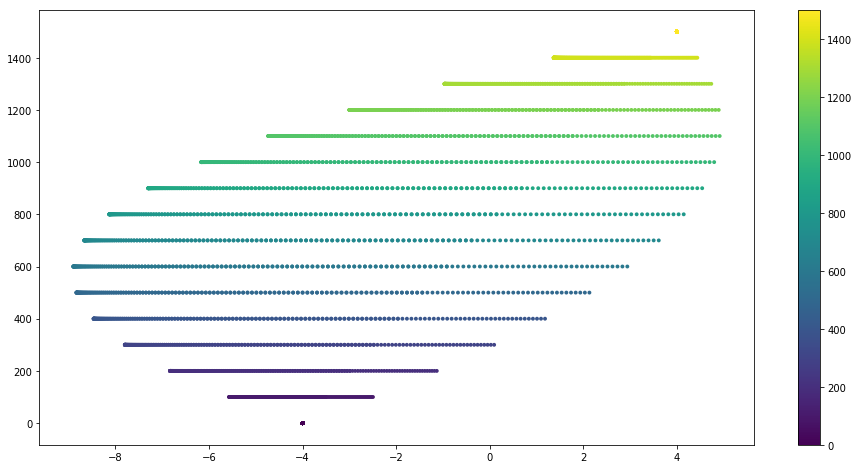

In [4]:
#Calculate the average flux of a day
sumU=np.zeros(len(Z));

#initiate plot
plt.figure(figsize=(16, 8))

for k in range(1, math.floor(Ntimes/10)):
    B=B0*math.sin(k*dt/(24*3600)*2*math.pi)
    U = np.multiply((0.5*B/Mu),np.power(Z,2)) - np.multiply((0.5*B*h/Mu),Z) + np.multiply((Uo/h),Z) -(Uo/2.0)   
    plt.scatter(U, Z, c=Z, s=15, edgecolor='none')

sumU=sumU+U;

plt.colorbar()

plt.show()



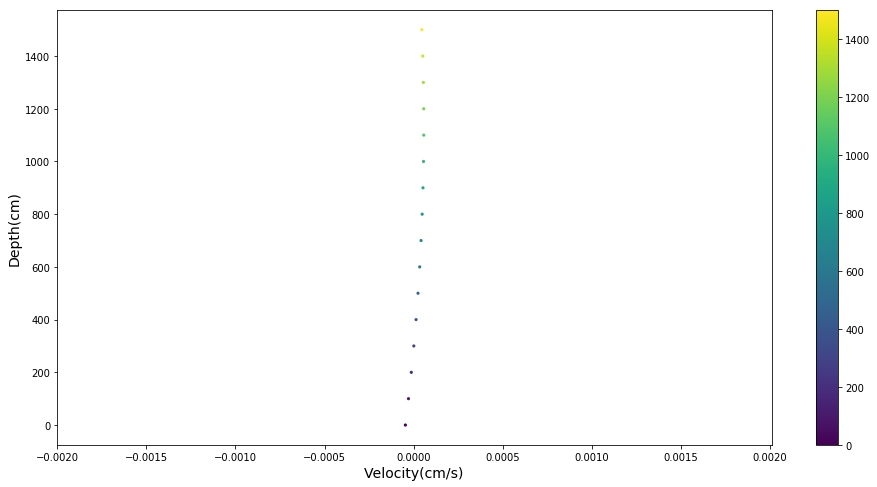

In [5]:
Lp3=math.floor((L/dx)/3);
Lp6=math.floor((L/dx)*2/3);

averageU=sumU/(24*3600);

#initiate plot
plt.figure(figsize=(16, 8))

plt.xlabel("Velocity(cm/s)", fontsize=14)
plt.ylabel("Depth(cm)", fontsize=14)

plt.scatter(averageU, Z, c=Z, s=10, edgecolor='none')

plt.colorbar()

plt.show()

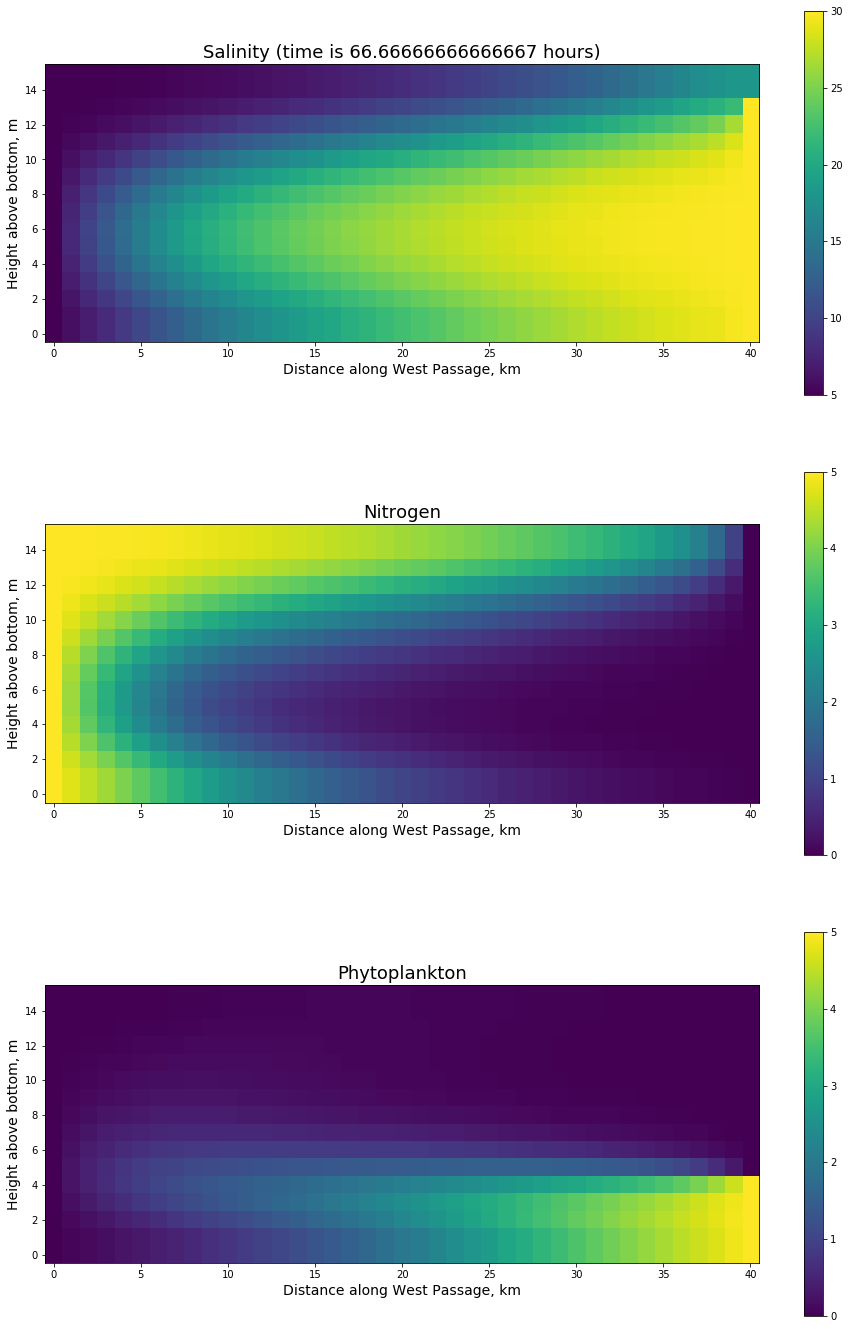

In [6]:
### As subplots

B=B0;
Ures = np.multiply((0.5*B/Mu),np.power(Z,2)) + np.multiply((Uo/h)-(0.5*B*h/Mu),Z)

#Calculate salinity over time
for k in range(1, Ntimes-800):  #TIME
    #B=B0*m.sin(k*dt/(24*3600)*2*m.pi);
    utide=tideamp*math.sin(k*dt/(12.0*3600.0)*2.0*math.pi);
    U=Ures+utide;
    
    utS[k]=U[13];
    utB[k]=U[3];
    utt[k]=(k*dt)/(3600*24);

    #velocityh = np.power(np.multiply((0.5*B/Mu),zV),2) + np.multiply(((Uo/h)-(0.5*B*h/Mu)),zV)
    #velocityh=np.transpose(velocityh)
    #Uh = np.tile(velocityh,(1, 10))
    
    C[:,0,k]=5
    P[0:5,math.floor(L/dx),k]=5
    
    for j in range(1, math.floor(math.floor(L/dx))):  #LENGTH
        for i in range(1, math.floor(math.floor(h/dz))):  #DEPTH
            Nsrc=Vm*(C[i][j][k-1]/(Ks+Cmax))*P[i][j][k-1]*(i/(h/dz))*dt
            
            if (U[i]>0):
                S[i][j][k]=S[i][j][k-1]-U[i]*(dt/dx)*(S[i][j+1][k-1]-S[i][j][k-1])+Kh*((dt/(dx**2)))*(S[i][j+1][k-1]-2*S[i][j][k-1]+S[i][j-1][k-1])+Kv*((dt/(dz**2)))*(S[i+1][j][k-1]-2*S[i][j][k-1]+S[i-1][j][k-1])
                C[i][j][k]=C[i][j][k-1]-U[i]*(dt/dx)*(C[i][j+1][k-1]-C[i][j][k-1])+Kh*((dt/(dx**2)))*(C[i][j+1][k-1]-2*C[i][j][k-1]+C[i][j-1][k-1])+Kv*((dt/(dz**2)))*(C[i+1][j][k-1]-2*C[i][j][k-1]+C[i-1][j][k-1])
                P[i][j][k]=P[i][j][k-1]-U[i]*(dt/dx)*(P[i][j+1][k-1]-P[i][j][k-1])+Kh*((dt/(dx**2)))*(P[i][j+1][k-1]-2*P[i][j][k-1]+P[i][j-1][k-1])+Kv*((dt/(dz**2)))*(P[i+1][j][k-1]-2*P[i][j][k-1]+P[i-1][j][k-1])
                C[i][j][k]=C[i][j][k]-Nsrc
                if (C[i][j][k] < 0.0):
                    C[i][j][k]=0.0
                P[i][j][k]=P[i][j][k]+Nsrc
            else:
                S[i][j][k]=S[i][j][k-1]-U[i]*(dt/dx)*(S[i][j][k-1]-S[i][j-1][k-1])+Kh*((dt/(dx**2)))*(S[i][j+1][k-1]-2*S[i][j][k-1]+S[i][j-1][k-1])+Kv*((dt/(dz**2)))*(S[i+1][j][k-1]-2*S[i][j][k-1]+S[i-1][j][k-1])
                C[i][j][k]=C[i][j][k-1]-U[i]*(dt/dx)*(C[i][j][k-1]-C[i][j-1][k-1])+Kh*((dt/(dx**2)))*(C[i][j+1][k-1]-2*C[i][j][k-1]+C[i][j-1][k-1])+Kv*((dt/(dz**2)))*(C[i+1][j][k-1]-2*C[i][j][k-1]+C[i-1][j][k-1])
                C[i][j][k]=C[i][j][k]-Nsrc
                if(C[i][j][k] < 0.0):
                    C[i][j][k]=0.0
                P[i][j][k]=P[i][j][k-1]-U[i]*(dt/dx)*(P[i][j][k-1]-P[i][j-1][k-1])+Kh*((dt/(dx**2)))*(P[i][j+1][k-1]-2*P[i][j][k-1]+P[i][j-1][k-1])+Kv*((dt/(dz**2)))*(P[i+1][j][k-1]-2*P[i][j][k-1]+P[i-1][j][k-1])
                P[i][j][k]=P[i][j][k]+Nsrc
    
    S[0,:,k]=S[1,:,k] #depth, dist, time
    S[len(S)-1,:,k]=S[len(S)-2,:,k]
    
    for i in range(1, math.floor(nz)):
        if (U[i]>=0):
            S[i][math.floor(L/dx)][k]=S[i][math.floor(L/dx-1)][k]
        else:
            S[i][math.floor(L/dx)][k]=30.0

    #clean up boundary conditions
    C[0,:,k]=C[1,:,k] #depth, dist, time
    C[len(C)-1,:,k]=C[len(C)-2,:,k]
    
    P[0,:,k]=P[1,:,k] #depth, dist, time
    P[len(P)-1,:,k]=P[len(P)-2,:,k]
        
    #if (k>=100 & k%60==0):
    if (k==1200): #pick a time step and plot
        plt.subplots(3,1, figsize=(16,24))
        
        plt.subplot(311)        
        plt.imshow(S[:,:,k], interpolation="nearest", cmap="viridis")

        ax = plt.gca()
        ax.invert_yaxis()        
        
        plt.ylabel('Height above bottom, m', fontsize=14)
        plt.xlabel('Distance along West Passage, km', fontsize=14)
        plt.title('Salinity (time is ' + str(k*dt/3600) + ' hours)', fontsize=18);
        
        plt.colorbar()
         
        plt.subplot(312)
        plt.imshow(C[:,:,k], interpolation="nearest", cmap="viridis")

        ax = plt.gca()
        ax.invert_yaxis()         
        
        plt.title('Nitrogen', fontsize=18 );
        plt.xlabel('Distance along West Passage, km', fontsize=14)
        plt.ylabel('Height above bottom, m', fontsize=14)

        plt.colorbar()       
        
        plt.subplot(313)    
        plt.imshow(P[:,:,k], interpolation="nearest", cmap="viridis")
        
        ax = plt.gca()
        ax.invert_yaxis()
        
        plt.title('Phytoplankton', fontsize=18 );
        plt.xlabel('Distance along West Passage, km', fontsize=14)
        plt.ylabel('Height above bottom, m', fontsize=14)

        plt.colorbar()
        
        plt.show()        

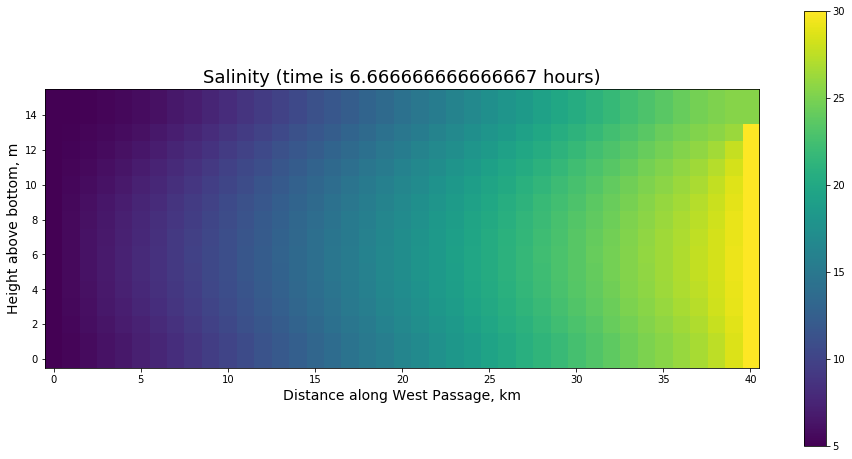

In [10]:
### As separate plots

B=B0;
Ures = np.multiply((0.5*B/Mu),np.power(Z,2)) + np.multiply((Uo/h)-(0.5*B*h/Mu),Z)

#Calculate salinity over time
for k in range(1, Ntimes-800):  #TIME
    #B=B0*m.sin(k*dt/(24*3600)*2*m.pi);
    utide=tideamp*math.sin(k*dt/(12.0*3600.0)*2.0*math.pi);
    U=Ures+utide;  #combined tidal effect of movement between voxels
    
    utS[k]=U[13];
    utB[k]=U[3];
    utt[k]=(k*dt)/(3600*24);

    #velocityh = np.power(np.multiply((0.5*B/Mu),zV),2) + np.multiply(((Uo/h)-(0.5*B*h/Mu)),zV)
    #velocityh=np.transpose(velocityh)
    #Uh = np.tile(velocityh,(1, 10))
    
    C[:,0,k]=5
    P[0:5,math.floor(L/dx),k]=5
    
    for j in range(1, math.floor(L/dx)):  #LENGTH
        for i in range(1, math.floor(h/dz)):  #DEPTH
            Nsrc=Vm*(C[i][j][k-1]/(Ks+Cmax))*P[i][j][k-1]*(i/(h/dz))*dt
            
            if (U[i]>0):
                S[i][j][k]=S[i][j][k-1]-U[i]*(dt/dx)*(S[i][j+1][k-1]-S[i][j][k-1])+Kh*((dt/(dx**2)))*(S[i][j+1][k-1]-2*S[i][j][k-1]+S[i][j-1][k-1])+Kv*((dt/(dz**2)))*(S[i+1][j][k-1]-2*S[i][j][k-1]+S[i-1][j][k-1])
                C[i][j][k]=C[i][j][k-1]-U[i]*(dt/dx)*(C[i][j+1][k-1]-C[i][j][k-1])+Kh*((dt/(dx**2)))*(C[i][j+1][k-1]-2*C[i][j][k-1]+C[i][j-1][k-1])+Kv*((dt/(dz**2)))*(C[i+1][j][k-1]-2*C[i][j][k-1]+C[i-1][j][k-1])
                P[i][j][k]=P[i][j][k-1]-U[i]*(dt/dx)*(P[i][j+1][k-1]-P[i][j][k-1])+Kh*((dt/(dx**2)))*(P[i][j+1][k-1]-2*P[i][j][k-1]+P[i][j-1][k-1])+Kv*((dt/(dz**2)))*(P[i+1][j][k-1]-2*P[i][j][k-1]+P[i-1][j][k-1])
                C[i][j][k]=C[i][j][k]-Nsrc
                if (C[i][j][k] < 0.0):
                    C[i][j][k]=0.0
                P[i][j][k]=P[i][j][k]+Nsrc
            else:
                S[i][j][k]=S[i][j][k-1]-U[i]*(dt/dx)*(S[i][j][k-1]-S[i][j-1][k-1])+Kh*((dt/(dx**2)))*(S[i][j+1][k-1]-2*S[i][j][k-1]+S[i][j-1][k-1])+Kv*((dt/(dz**2)))*(S[i+1][j][k-1]-2*S[i][j][k-1]+S[i-1][j][k-1])
                C[i][j][k]=C[i][j][k-1]-U[i]*(dt/dx)*(C[i][j][k-1]-C[i][j-1][k-1])+Kh*((dt/(dx**2)))*(C[i][j+1][k-1]-2*C[i][j][k-1]+C[i][j-1][k-1])+Kv*((dt/(dz**2)))*(C[i+1][j][k-1]-2*C[i][j][k-1]+C[i-1][j][k-1])
                C[i][j][k]=C[i][j][k]-Nsrc
                if(C[i][j][k] < 0.0):
                    C[i][j][k]=0.0
                P[i][j][k]=P[i][j][k-1]-U[i]*(dt/dx)*(P[i][j][k-1]-P[i][j-1][k-1])+Kh*((dt/(dx**2)))*(P[i][j+1][k-1]-2*P[i][j][k-1]+P[i][j-1][k-1])+Kv*((dt/(dz**2)))*(P[i+1][j][k-1]-2*P[i][j][k-1]+P[i-1][j][k-1])
                P[i][j][k]=P[i][j][k]+Nsrc
    
    S[0,:,k]=S[1,:,k] #depth, dist, time
    S[len(S)-1,:,k]=S[len(S)-2,:,k]
    
    for i in range(1, math.floor(nz)-1):
        if (U[i]>=0):
            S[i][math.floor(L/dx)][k]=S[i][math.floor(L/dx-1)][k]
        else:
            S[i][math.floor(L/dx)][k]=30.0

    #clean up boundary conditions
    for i in range(0, math.floor(h/dz)):
        C[0][j][k]=C[1][j][k] #depth, dist, time
        C[len(C)-1][j][k]=C[len(C)-2][j][k]
        
        P[0][j][k]=P[1][j][k] #depth, dist, time
        P[len(P)-1][j][k]=P[len(P)-2][j][k]
        
    #if (k>=100 & mod(k,60)==0):
    if (k==120):
        #initiate plot
        plt.figure(figsize=(16, 8))
        
        plt.imshow(S[:,:,k], interpolation="nearest", cmap="viridis")

        ax = plt.gca()
        ax.invert_yaxis()
        
        plt.xlabel('Distance along West Passage, km', fontsize=14)
        plt.ylabel('Height above bottom, m', fontsize=14)
        plt.title('Salinity (time is ' + str(k*dt/3600) + ' hours)', fontsize=18);
        
        plt.colorbar()
        
        plt.show()     

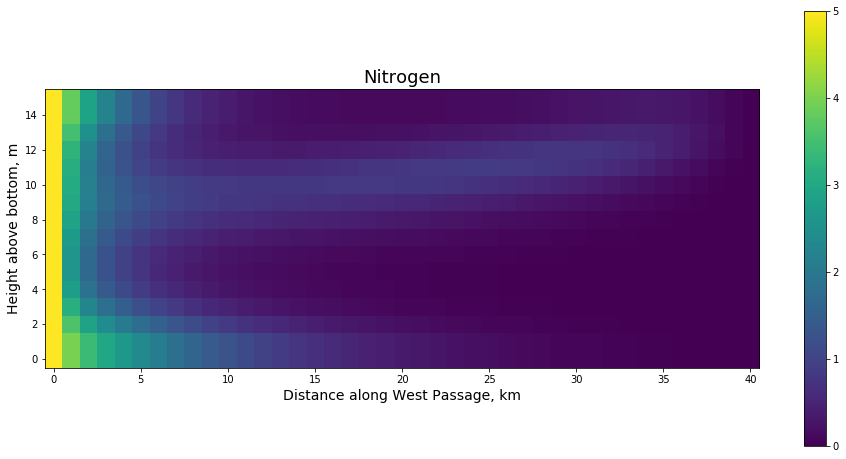

In [11]:
        plt.figure(figsize=(16, 8))
    
        plt.imshow(C[:,:,k], interpolation="nearest", cmap="viridis")

        ax = plt.gca()
        ax.invert_yaxis()         
        
        plt.title('Nitrogen', fontsize=18 );
        plt.xlabel('Distance along West Passage, km', fontsize=14)
        plt.ylabel('Height above bottom, m', fontsize=14)

        plt.colorbar()
        
        plt.show()
 


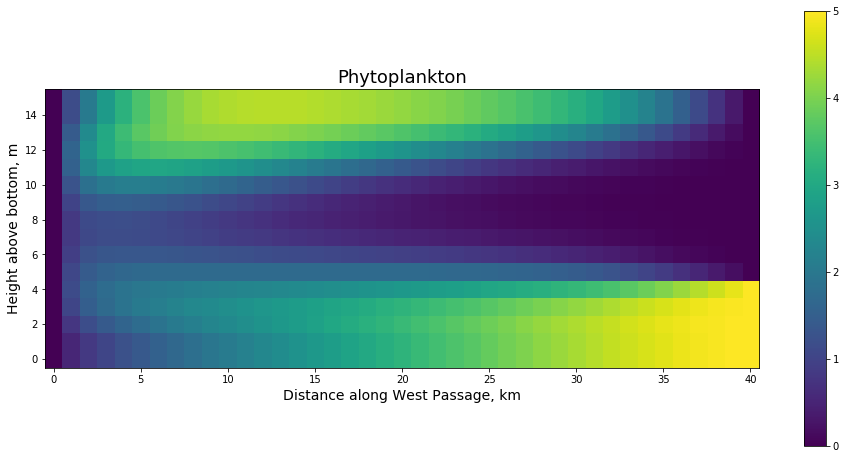

In [12]:
        plt.figure(figsize=(16, 8))
    
        plt.imshow(P[:,:,k], interpolation="nearest", cmap="viridis")
        
        ax = plt.gca()
        ax.invert_yaxis()
        
        plt.title('Phytoplankton', fontsize=18 );
        plt.xlabel('Distance along West Passage, km', fontsize=14)
        plt.ylabel('Height above bottom, m', fontsize=14)

        plt.colorbar()
        
        plt.show()